# STOCK PRICE FORECASTING

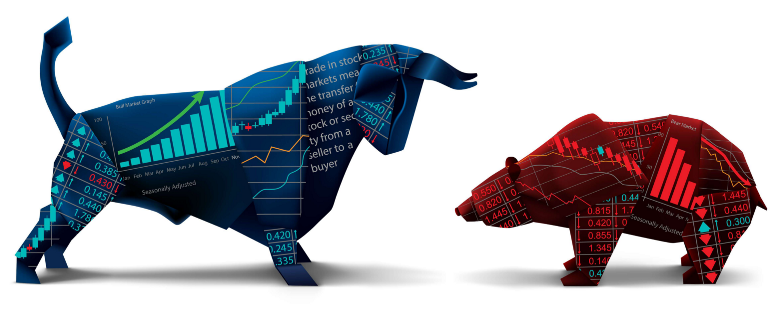

In [8]:
import pandas_datareader as web
import pandas as pd
import datetime as date

In [10]:
start = '2000-01-01'
end = date.datetime.now()
df = web.DataReader('AWL.NS', 'yahoo', start,end)
df

High         Low        Open       Close     Volume  \
Date                                                                    
2022-02-08  271.250000  227.000000  227.000000  268.250000  135533461   
2022-02-09  321.899994  272.000000  273.649994  321.899994   70655011   
2022-02-10  386.250000  345.000000  356.700012  386.250000   56509643   
2022-02-11  419.899994  351.250000  408.700012  381.000000   88580117   
2022-02-14  398.899994  352.100006  364.200012  376.299988   43047644   
...                ...         ...         ...         ...        ...   
2022-10-25  689.000000  675.049988  689.000000  678.400024    1075083   
2022-10-27  685.000000  665.000000  683.799988  670.549988    1668705   
2022-10-28  694.000000  664.049988  672.000000  671.049988    2049394   
2022-10-31  681.049988  667.000000  674.950012  672.400024    1347016   
2022-11-01  724.299988  672.150024  678.700012  716.450012    7369051   

             Adj Close  
Date                    
2022-02-08  268.250000  
2022-02-09  321.899994  
2022-02-10  386.250000  
2022-02-11  381.000000  
2022-02-14  376.299988  
...                ...  
2022-10-25  678.400024  
2022-10-27  670.549988  
2022-10-28  671.049988  
2022-10-31  672.400024  
2022-11-01  716.450012  

[181 rows x 6 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 181 entries, 2022-02-08 to 2022-11-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       181 non-null    float64
 1   Low        181 non-null    float64
 2   Open       181 non-null    float64
 3   Close      181 non-null    float64
 4   Volume     181 non-null    int64  
 5   Adj Close  181 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 9.9 KB


In [4]:
df.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

# DIFFERENCE BETWEEN CLOSING PRICE

In [5]:
df_close=df['Close']
df_return=pd.DataFrame(df_close).diff()
df_return

Close
Date                
2000-01-03       NaN
2000-01-04  1.457739
2000-01-05 -1.004850
2000-01-06  1.184118
2000-01-07  1.160532
...              ...
2022-10-25  8.049988
2022-10-27  1.100037
2022-10-28 -8.900024
2022-10-31  3.049988
2022-11-01  3.100037

[5704 rows x 1 columns]

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Candlestick CHART

In [7]:
figure= make_subplots(specs=[[{"secondary_y" : True}]])

figure.add_trace(go.Candlestick(
        x=df.index,
        low=df['Low'],
        high=df['High'],
        close=df['Close'],
        open =df['Open']),
        secondary_y=True)

figure.add_trace(go.Bar(x=['Datetime'], y=df['Volume']),
                  secondary_y=False)

A lag plot is a special type of scatter plot in which the X-axis represents the dataset with some time units behind or ahead 
as compared to the Y-axis. The difference between these time units is called lag or lagged and it is represented by k.

The lag plot contains the following axes:

Horizontal axis: Yi for all i 
Vertical axis: Yi+1 for all i, where k is lag value.
(k=1 by Default)

e.g: if y(t)= [10,20,25,30,50...] then y(t+1) =[20,25,30,50,...]

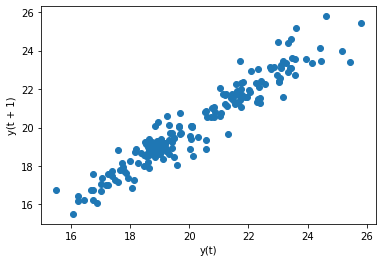

In [10]:
from pandas.plotting import lag_plot

lag_plot(df['Close'].iloc[:200]);

In [11]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

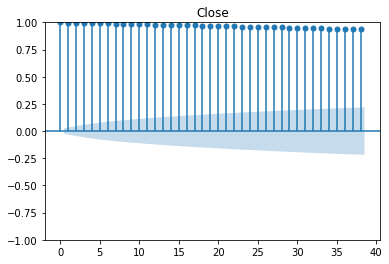

In [12]:
title = 'Close'
lags = 0
plot_acf(df["Close"],title=title);

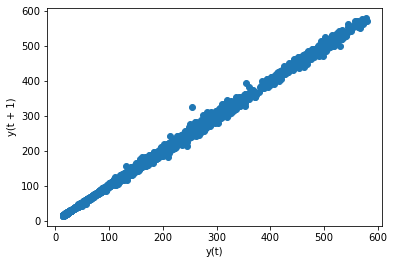

In [13]:
lag_plot(df['Close']);

In [14]:
import matplotlib.pyplot as plt

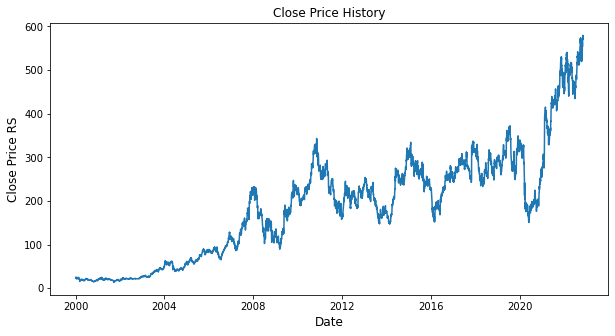

In [15]:
plt.figure(figsize=(10,5))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Close Price RS', fontsize = 12)
plt.show()

### ICICI stock

In [12]:
start = '2000-01-01'
end = date.datetime.now()
df1 = web.DataReader('ICICIBANK.NS', 'yahoo', start,end)
df1

High         Low        Open       Close      Volume  \
Date                                                                     
2002-07-01   25.818180   24.818180   25.418180   25.127272   2047540.0   
2002-07-02   27.636362   25.236362   25.454544   26.745455   5546354.0   
2002-07-03   28.181818   26.645454   26.727272   28.090908   5745267.0   
2002-07-04   28.799999   27.036364   28.181818   27.390909   3896601.0   
2002-07-05   27.863636   26.945454   27.090908   27.672728   3261038.0   
...                ...         ...         ...         ...         ...   
2022-10-25  943.250000  922.950012  942.049988  925.049988  15838120.0   
2022-10-27  933.700012  920.250000  926.049988  924.400024  16080842.0   
2022-10-28  927.500000  901.000000  918.000000  907.849976   9854094.0   
2022-10-31  917.049988  904.599976  912.599976  908.700012   9000840.0   
2022-11-01  921.000000  899.549988  921.000000  908.599976   9820292.0   

             Adj Close  
Date                    
2002-07-01   18.183352  
2002-07-02   19.354349  
2002-07-03   20.327984  
2002-07-04   19.821430  
2002-07-05   20.025368  
...                ...  
2022-10-25  925.049988  
2022-10-27  924.400024  
2022-10-28  907.849976  
2022-10-31  908.700012  
2022-11-01  908.599976  

[5053 rows x 6 columns]

# Hypothesis Testing

 Null Hypothesis = Mean of OPEN and CLOSE of State Bank of India is same. 

Alternate Hypothesis = Mean of OPEN and CLOSE of State Bank of India is not same . 

In [13]:
df.describe()

High         Low        Open       Close        Volume  \
count  181.000000  181.000000  181.000000  181.000000  1.810000e+02   
mean   624.042266  594.053038  608.719061  609.241713  8.882969e+06   
std    134.798541  131.012309  135.367916  132.082329  1.535376e+07   
min    271.250000  227.000000  227.000000  268.250000  5.562450e+05   
25%    586.750000  554.099976  566.900024  576.700012  1.521515e+06   
50%    667.000000  631.000000  648.000000  648.299988  3.471491e+06   
75%    709.000000  685.000000  700.000000  696.700012  9.561082e+06   
max    878.000000  798.950012  860.000000  841.000000  1.355335e+08   

        Adj Close  
count  181.000000  
mean   609.241713  
std    132.082329  
min    268.250000  
25%    576.700012  
50%    648.299988  
75%    696.700012  
max    841.000000

In [14]:
from statsmodels.stats import weightstats
import scipy.stats as stats

In [15]:
P1=df['Open']
P2=df['Close']

In [16]:
weightstats.ztest(P1,P2)

(-0.03717843512281932, 0.9703427330019034)

Here P_value is greater than 0.05 .

Hence , accept the Null Hypothesis.

So, the mean of Open and Close of SBI Bank is same . 

In [17]:
df1.describe()

High          Low         Open        Close        Volume  \
count  5053.000000  5053.000000  5053.000000  5053.000000  5.053000e+03   
mean    245.052327   238.106916   241.709847   241.594253  1.932085e+07   
std     189.369005   185.669047   187.500498   187.581127  1.893806e+07   
min      21.454544    19.890909    20.272726    20.100000  0.000000e+00   
25%     121.772728   115.563637   117.454544   118.572723  8.575836e+06   
50%     195.272720   190.000000   192.727264   192.509094  1.484403e+07   
75%     301.500000   293.850006   298.200012   297.700012  2.353410e+07   
max     943.250000   922.950012   942.049988   926.299988  2.868577e+08   

         Adj Close  
count  5053.000000  
mean    226.182839  
std     191.914721  
min      14.545364  
25%      97.000526  
50%     169.316681  
75%     284.523651  
max     926.299988

Null Hypothesis = Mean of CLOSE of SBI Bank and ICICI Bank is same. 

Alternate Hypothesis = Mean of CLOSE of SBI bank and ICICI Bank is not same . 

In [18]:
sbi= df["Close"]
ici= df1["Close"]

In [19]:
weightstats.ztest(sbi,ici)

(26.13600638654087, 1.4216030516077175e-150)

Here P_value is less than 0.05 .

Hence , reject the Null Hypothesis.

So, the mean of Close of SBI bank and ICICI bank is not same . 

<AxesSubplot:xlabel='Date'>

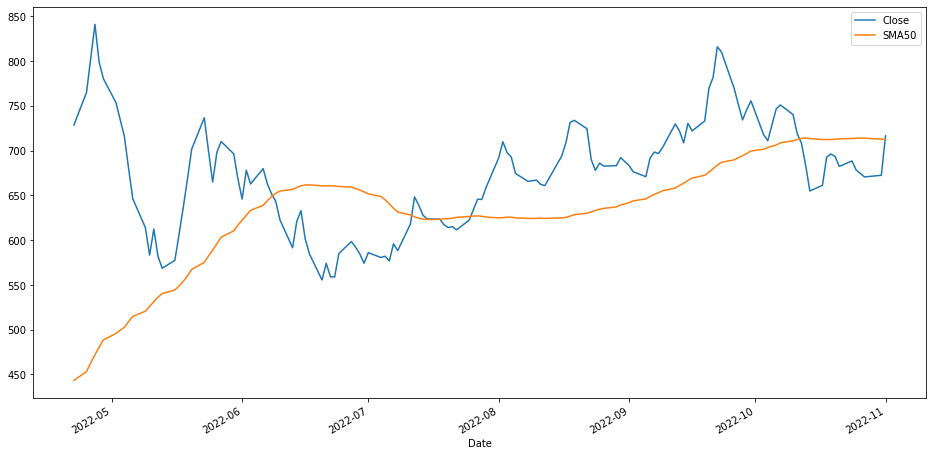

In [20]:
df_sma50 = df['Close'].to_frame() 
df_sma50['SMA50'] = df_sma50['Close'].rolling (50).mean()
df_sma50.dropna (inplace=True)

df_sma50[['Close', 'SMA50']].plot(label = 'SBIN', figsize=(16,8))

In [21]:
import math

In [22]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

In [23]:
training_data_len

145

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

In [26]:
scaled_data.shape

(181, 1)

In [27]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.09367088, 0.20602357, 0.19685727, 0.18865122,
       0.20183327, 0.18996069, 0.15984284, 0.15024005, 0.10362288,
       0.08040155, 0.1340899 , 0.11296379, 0.17084244, 0.19397644,
       0.199127  , 0.1955478 , 0.1615888 , 0.12666956, 0.13016148,
       0.12597118, 0.13120907, 0.13260587, 0.12719338, 0.1257093 ,
       0.13618507, 0.19476209, 0.21475338, 0.21798342, 0.22522916,
       0.2424269 , 0.26364033, 0.33653426, 0.40453952, 0.39118287,
       0.43413361, 0.47917942, 0.49602789, 0.54421652, 0.59476216,
       0.54168485, 0.4912265 , 0.53915319, 0.58952427, 0.64233963,
       0.69786122, 0.71523357, 0.69777394, 0.75329553, 0.8036665 ,
       0.86721958, 0.93391536, 1.        , 0.9265823 , 0.89419472,
       0.84740284, 0.78166742, 0.71924926, 0.65988653, 0.60349197])]
[0.5499781754692272]

[array([0.        , 0.09367088, 0.20602357, 0.19685727, 0.18865122,
       0.20183327, 0.18996069, 0.15984284, 0.15024005, 0.10362288,
       0.08040155, 0.1340899 , 0.112

In [28]:
train_data.shape

(145, 1)

In [29]:
import numpy as np

In [30]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [31]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(85, 60, 1)

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [33]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train,y_train, batch_size= 1, epochs=1)

In [ ]:
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60 , len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse = math.sqrt(mean_squared_error(y_test, predictions))

In [ ]:
rmse

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize = (10,6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price RS', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'],loc = 'lower right')
plt.show()

In [ ]:
valid[1100:]

In [ ]:
stock = web.DataReader('SBIN.NS', data_source='yahoo', start= '2000-01-01',end = date.datetime.now())
new_df = stock.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
x_test = []
x_test.append(last_60_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test , (x_test.shape[0], x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price